In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as op 
import seaborn as sns
from __future__ import division

In [3]:
df = pd.read_csv("Lab2Data.csv")
print(df.head())

   Radius  Texture  Perimeter    Area  Smoothness  Compactness  Concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   Concave_points  Symmetry  Fractal_dimension  ...  W_Texture  W_Perimeter  \
0         0.14710    0.2419            0.07871  ...      17.33       184.60   
1         0.07017    0.1812            0.05667  ...      23.41       158.80   
2         0.12790    0.2069            0.05999  ...      25.53       152.50   
3         0.10520    0.2597            0.09744  ...      26.50        98.87   
4         0.10430    0.1809            0.05883  ...      16.67       152.20   

   W_Area  W_Smoothness  W_Compactness  W_Concavity  W_Concave

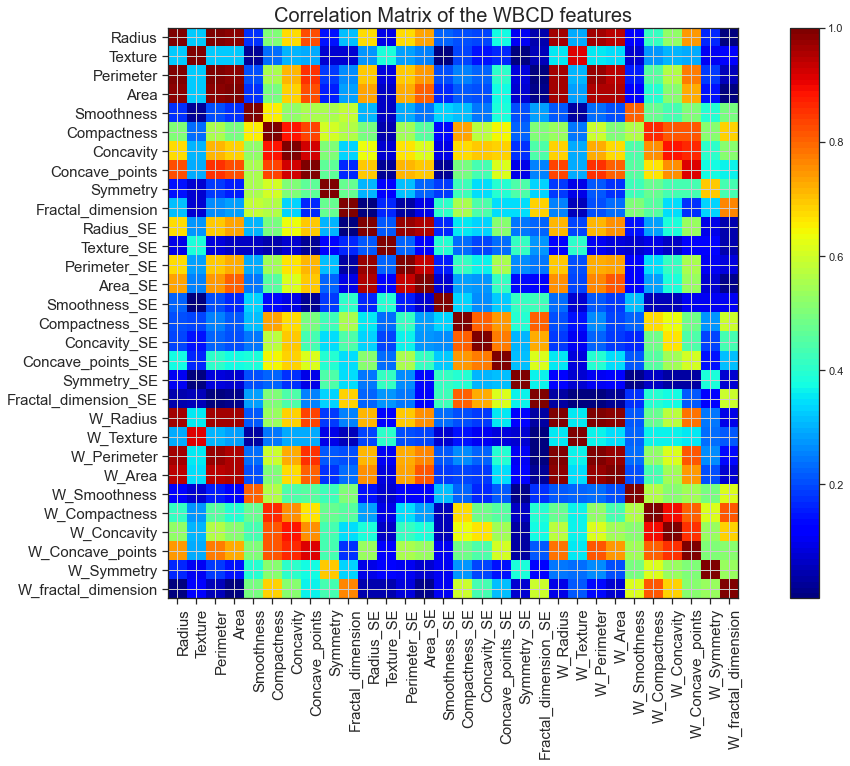

In [5]:
def features_correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 100)
    
    # interpolation='nearest' simply displays an image without 
    # trying to interpolate between pixels if the display 
    # resolution is not the same as the image resolution
    # The correlation is returned in absolute values:
    cax = ax1.imshow(df.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix of the WBCD features',fontsize=20)
    labels=list(df.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
df_features = df.drop(df.columns[-1],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(df_features)

In [6]:
# Create the correlation matrix with absolute values
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

<ipython-input-6-2d29f4af44f3>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


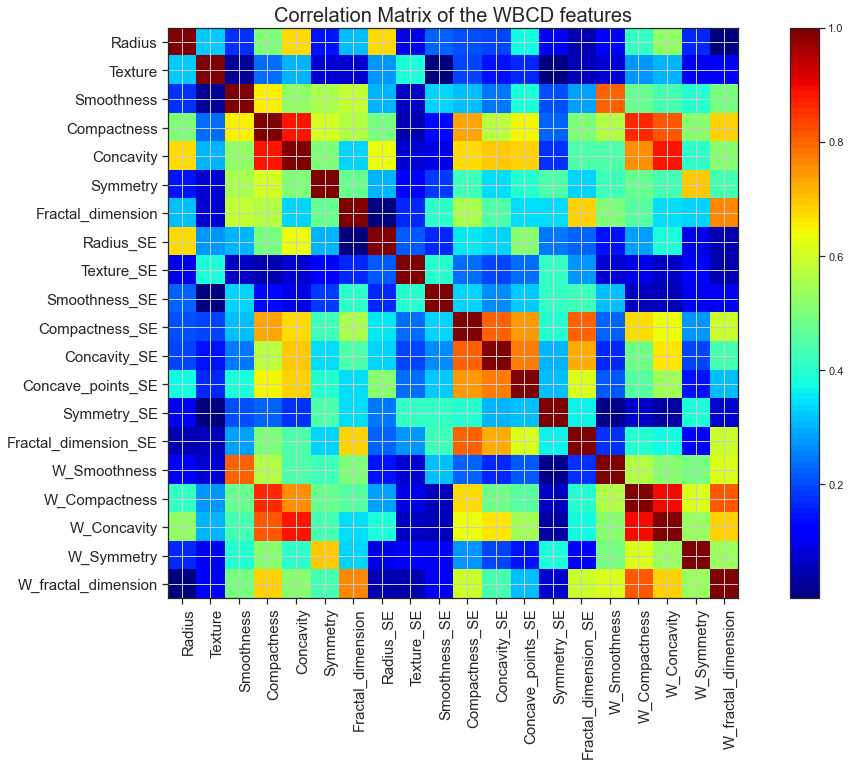

In [7]:
# Drop the redundant features from the df
df_features_corr_dropped = df_features.drop(df_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# Using the feature_correlation_matrix() function
features_correlation_matrix(df_features_corr_dropped)

In [8]:
df_features_corr_dropped.corr().abs()


,Radius,Texture,Smoothness,Compactness,Concavity,Symmetry,Fractal_dimension,Radius_SE,Texture_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_points_SE,Symmetry_SE,Fractal_dimension_SE,W_Smoothness,W_Compactness,W_Concavity,W_Symmetry,W_fractal_dimension
Radius,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,0.311631,0.679090,0.097317,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.119616,0.413463,0.526911,0.163953,0.007066
Texture,0.323782,1.000000,0.023389,0.236702,0.302418,0.071401,0.076437,0.275869,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.277830,0.301025,0.105008,0.119205
Smoothness,0.170581,0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.472468,0.434926,0.394309,0.499316
Compactness,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.865809,0.816275,0.510223,0.687382
Concavity,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.448822,0.754968,0.884103,0.409464,0.514930
Symmetry,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.473200,0.433721,0.699826,0.438413
Fractal_dimension,0.311631,0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.458798,0.346234,0.334019,0.767297
Radius_SE,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.287103,0.380585,0.094543,0.049559
Texture_SE,0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,0.073658,0.092439,0.068956,0.128215,0.045655
Smoothness_SE,0.222600,0.006614,0.332375,0.135299,0.098564,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,0.314457,0.055558,0.058298,0.107342,0.101480


In [9]:
# The Logistic Function
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

In [11]:
# Logistic Regression Cost Function
def calcCostFunction(theta, X, y):
    
    # number of training examples
    m,n = X.shape  
    
    # Calculate h = X * theta (we are using vectorized version)
    h = X.dot(theta) 
    
    # Calculate the Cost J
    J = -(np.sum(y * np.log(sigmoid(h)) + (1 - y) * np.log(1 - sigmoid(h)))/m)
    return J

In [12]:
# The Gradient Function
def calcGradient(theta, X, y):
    
    # number of training examples
    m,n = X.shape    
    
    # Calculate h = X * theta
    h = X.dot(theta)
    
    # Calculate the error = (h - y)
    error = sigmoid(h) - y
    
    # Calculate the new theta
    gradient = 1/m * (X.T).dot(error)
    
    return gradient

In [13]:
# The Feature Scaling and Normalization
# for two variables

def FeatureScalingNormalization(X):
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # Initialize mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1]) 
    
    # Initialize sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1]) 

    # mu (mean)
    mu = np.vstack((X[0].mean(), \
                    X[1].mean()))

    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1),\
                       X[1].std(ddof=1)))     

    # Number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

In [14]:
# Calculate the accuracy
def CalcAccuracy(theta, X):
    p = sigmoid(X.dot(theta)) >= 0.5
    return p

In [16]:
# Make the X and y numpy arrays,
# containing the values of
# Radius and Texture
X = np.vstack((np.asarray(df.Radius.values), \
               np.asarray(df.Texture.values)))
y = np.asarray(df.Diagnosis.values)

In [17]:
# Normalize X using the FeatureScalingNormalization function, and 
# copy the results in the "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNormalization(X)

# get the normalized X matrix
X = np.asarray(featuresNormalizeresults[0]).T

# get the mean
mu = featuresNormalizeresults[1]

# get the sigma
sigma = featuresNormalizeresults[2]

In [18]:
# Add a column of 'ones' to X

# number of training examples
m = len(y) 

# number of features
n = len(X)

# Add a column of ones to the X matrix
X = np.vstack((np.ones(m), X)).T

In [19]:
# First test: Compute cost and gradient, 
# and display the updated theta starting with initial theta = [0, 0, 0]

initial_theta = np.zeros(n+1); # set theta = [0, 0, 0]

print ("J", calcCostFunction(theta=initial_theta, X=X, y=y))
print ("grad", calcGradient(theta=initial_theta, X=X, y=y))

J 0.6931471805599453
grad [ 0.12741652 -0.35265304 -0.20056252]


In [20]:
# Second test: Compute cost and gradient, 
# and display the updated theta starting with a non-zero theta

test_theta = [-24, 1.2, 0.2];

print ("J", calcCostFunction(theta=initial_theta, X=X, y=y))
print ("grad", calcGradient(theta=initial_theta, X=X, y=y))

J 0.6931471805599453
grad [ 0.12741652 -0.35265304 -0.20056252]


In [21]:
# Gradient Descent Advanced Optimization: BFGS
# Update and find the optimal theta
m , n = X.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = calcCostFunction, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'BFGS',
                                 jac = calcGradient);
theta = Result.x;
Result

      fun: 0.2558201286363281
 hess_inv: array([[12.66527269, -1.22908954, -2.82539649],
       [-1.22908954, 71.16261306,  7.07658929],
       [-2.82539649,  7.07658929, 13.39777084]])
      jac: array([7.36409258e-07, 3.24760454e-08, 9.55291040e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 19
     njev: 20
   status: 0
  success: True
        x: array([-0.70755981,  3.72528774,  0.93824469])

In [22]:
# Calculate accuracy
p = CalcAccuracy(theta, X)
p = (p == y) * 100
print ("Train Accuracy:", p.mean())

Train Accuracy: 89.103690685413


In [23]:
# Perform a Query:
# Predict the risk of malignancy for Radius = 18.00 and Texture = 10.12

query = np.asarray([1, 18.00, 10.12])

# Scale and Normalize the query
query_Normalized = \
np.asarray([1, ((query[1]-float(mu[0]))/float(sigma[0])),\
                               ((query[2]-float(mu[1]))/float(sigma[1]))])


prediction = sigmoid(query_Normalized.dot(theta));
prediction

0.7999520268226942